<a href="https://colab.research.google.com/github/DSabarish/Practice/blob/main/Comparing_two_or_more_groups_and_its_Associated_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


| **Test**              | **Purpose**                                                                    | **Null Hypothesis (H0)**                                    | **Alternative Hypothesis (Ha)**                                 | **Assumptions**                                                          | **Advantages**                                                                    | **Limitations**                                                                                |
| --------------------- | ------------------------------------------------------------------------------ | ----------------------------------------------------------- | --------------------------------------------------------------- | ------------------------------------------------------------------------ | --------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **ANOVA**             | Compare means of two or more groups                                            | All group means are equal                                   | At least one group mean is different                            | - Normality of residuals<br>- Homogeneity of variances<br>- Independence | - More powerful when assumptions are met<br>- Provides specific group differences | - Requires normality<br>- Sensitive to outliers                                                |
| **Kruskal-Wallis**    | Compare medians of two or more groups.<br><br>Acts as an alternative to ANOVA. | All group medians are equal                                 | At least one group median is different                          | - Independence of observations                                           | - No assumption of normality<br>- Robust to outliers                              | - Does not identify which groups differ<br>- Less powerful than ANOVA when assumptions are met |
| **Shapiro-Wilk Test** | Test for normality                                                             | Data is normally distributed                                | Data is not normally distributed                                | - Normality                                                              | - Effective for small to moderate sample sizes                                    | - May not work well with very large datasets                                                   |
| **KS Test**           | Test for normality                                                             | Data follows a specified distribution (often normal)        | Data does not follow the specified distribution                 | - None (Distribution-free)                                               | - Suitable for comparing sample distribution with a reference distribution        | - Less powerful for small samples                                                              |
| **Levene's Test**     | Test for equal variances (homogeneity of variance) across groups               | Variances are equal across groups                           | Variances are not equal across groups                           | - Homogeneity of variances                                               | - Useful when data does not meet normality assumption                             | - Less powerful if data is normally distributed                                                |
| **QQ Plot**           | Visual check for normality                                                     | Points form a straight line if data is normally distributed | Points deviate significantly from a straight line if not normal | - None (Visual method)                                                   | - Easy and quick visual assessment                                                | - Subjective interpretation                                                                    |


### Initial Setup

In [23]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(42)
data = {
    'Group': np.random.choice(['A', 'B', 'C'], size=100),
    'Value': np.concatenate([
        np.random.normal(loc=50, scale=5, size=33),  # Group A
        np.random.normal(loc=55, scale=5, size=33),  # Group B
        np.random.normal(loc=60, scale=5, size=34)   # Group C
    ])
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
display(df)

# 	Group	Value
# 0	C	52.910614
# 1	A	54.438742
# 2	C	54.471662
# 3	C	53.774989
# 4	A	48.964171
# ...	...	...
# 95	A	62.780609
# 96	A	65.219303
# 97	C	62.632241
# 98	A	66.819433
# 99	A	72.695814

,Group,Value
0,C,52.910614
1,A,54.438742
2,C,54.471662
3,C,53.774989
4,A,48.964171
...,...,...
95,A,62.780609
96,A,65.219303
97,C,62.632241
98,A,66.819433


# Test Name   : One-Way ANOVA

In [24]:
"""
----------------------------------------------------------------------------------------------------------------
Test Name   : One-Way ANOVA
Use Case    : Compare means of two or more groups.
Assumption  : - Normality: Data in each group should be normally distributed
             - Homogeneity of variances: Variances across groups should be approximately equal
             - Independence of observations
Advantage   : - More powerful than Kruskal-Wallis when assumptions are met
Limitations : - Assumptions must be met to ensure validity

H0 : All group means are equal
Ha : At least one group mean is different

----------------------------------------------------------------------------------------------------------------
"""
from scipy.stats import f_oneway

# Sample data
G1 = df[df["Group"] == "A"]["Value"]
G2 = df[df["Group"] == "B"]["Value"]
G3 = df[df["Group"] == "C"]["Value"]

# Perform One-Way ANOVA test
alpha = 0.05
anova_stat, anova_p_value = f_oneway(G1, G2, G3)
print("Test statistic:", anova_stat)
print("P-value:", anova_p_value)
print("alpha:", alpha)

# Interpretation
if anova_p_value < alpha:
    print("p_value < alpha")
    print("Inference: Reject H0: At least one group has a different mean")
else:
    print("p_value > alpha")
    print("Inference: Fail to reject H0: All groups have the same mean")


Test statistic: 1.1159814984781968
P-value: 0.3317625460383211
alpha: 0.05
p_value > alpha
Inference: Fail to reject H0: All groups have the same mean


### Kruskal-Wallis Test


In [25]:
"""
----------------------------------------------------------------------------------------------------------------
Test Name   : Kruskal-Wallis
Use Case    : Compare medians of two or more groups.Acts as an alternative to ANOVA.
Assumption  : Independence of observations
Advantage   : - No assumption of normality
            : - Robust to outliers
Limitations : - Does not identify which groups differ
            : - Less powerful than ANOVA when assumptions are met

H0 : All group medians are equal
Ha : At least one group median is different

----------------------------------------------------------------------------------------------------------------
"""
from scipy.stats import kruskal

# Sample data
G1 = df[df["Group"] == "A"]["Value"]
G2 = df[df["Group"] == "B"]["Value"]
G3 = df[df["Group"] == "C"]["Value"]

# Perform Kruskal-Wallis test
alpha = 0.05
stat, p_value = kruskal(G1, G2, G3)
print("Test statistic:", stat)
print("P-value:", p_value)
print("alpha:", alpha)

# Interpretation
if p_value < alpha:
    print("p_value < alpha")
    print("Inference: Reject H0: At least one group has a different median")
else:
    print("p_value > alpha")
    print("Inference: Fail to reject H0: All groups have the same median")

Test statistic: 1.7517273017624575
P-value: 0.4165021518503145
alpha: 0.05
p_value > alpha
Inference: Fail to reject H0: All groups have the same median


### Test Name   : Shapiro-Wilk Test

In [26]:
"""
----------------------------------------------------------------------------------------------------------------
Test Name   : Shapiro-Wilk Test
Use Case    : Test for normality of data.
Assumption  : None, but more reliable for small to moderate sample sizes.
Advantage   : - Provides a formal test for normality
             - Suitable for small sample sizes
Limitations : - May not perform well with very large sample sizes

H0 : Data is normally distributed
Ha : Data is not normally distributed

----------------------------------------------------------------------------------------------------------------
"""
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
alpha = 0.05
test_stat, p_value = shapiro(df["Value"])

print("Test statistic:", test_stat)
print("P-value:", p_value)
print("alpha:", alpha)

# Interpretation
if p_value < alpha:
    print("p_value < alpha")
    print("Inference: Reject H0: Data is not normally distributed")
else:
    print("p_value > alpha")
    print("Inference: Fail to reject H0: Data is normally distributed")


Test statistic: 0.9864153861999512
P-value: 0.39952734112739563
alpha: 0.05
p_value > alpha
Inference: Fail to reject H0: Data is normally distributed


### Test Name   : Kolmogorov-Smirnov (KS) Test

In [27]:
"""
----------------------------------------------------------------------------------------------------------------
Test Name   : Kolmogorov-Smirnov (KS) Test
Use Case    : Test if a sample follows a specified distribution (e.g., normal distribution).
Assumption  : None, but more sensitive near the center of the distribution than at the tails.
Advantage   : - Does not assume any specific distribution
             - Can be used to compare a sample to any continuous distribution
Limitations : - Less sensitive at the tails of the distribution

H0 : Sample follows the specified distribution
Ha : Sample does not follow the specified distribution

----------------------------------------------------------------------------------------------------------------
"""
from scipy.stats import kstest, norm
import numpy as np

# Generate or load your data (assuming df["Value"] contains normally distributed data)
data = df["Value"]

# Standardize the data (z-score normalization)
data_standardized = (data - np.mean(data)) / np.std(data)

# Perform KS Test against the normal distribution
alpha = 0.05
test_stat, p_value = kstest(data_standardized, 'norm')

# Print the results
print("Test statistic:", test_stat)
print("P-value:", p_value)
print("alpha:", alpha)

# Interpretation
if p_value < alpha:
    print("p_value < alpha")
    print("Inference: Reject H0: Data does not follow the specified distribution")
else:
    print("p_value > alpha")
    print("Inference: Fail to reject H0: Data follows the specified distribution")


Test statistic: 0.07825905738343797
P-value: 0.5463686367724077
alpha: 0.05
p_value > alpha
Inference: Fail to reject H0: Data follows the specified distribution


### Test Name   : Levene's Test

In [28]:
"""
----------------------------------------------------------------------------------------------------------------
Test Name   : Levene's Test
Use Case    : Test if the variances of two or more groups are equal.
Assumption  : Data should be from populations that are normally distributed.
Advantage   : Robust to moderate departures from normality.
Limitations : Sensitive to extreme departures from normality.

H0 : Variances of all groups are equal
Ha : Variances of at least one group are not equal

----------------------------------------------------------------------------------------------------------------
"""
from scipy.stats import levene
import pandas as pd

# Example data (assuming df has a column "Group" with groups A and B, and a numeric column "Values" associated with each group)
G1 = df[df["Group"] == "A"]["Value"]  # Numeric data for group A
G2 = df[df["Group"] == "B"]["Value"]  # Numeric data for group B
G3 = df[df["Group"] == "C"]["Value"]  # Numeric data for group C

# Perform Levene's test
alpha = 0.05
test_stat, p_value = levene(G1, G2,G3)  # Add more groups as needed: levene(G1, G2, G3, ...)

# Print the results
print("Test statistic:", test_stat)
print("P-value:", p_value)
print("alpha:", alpha)

# Interpretation
if p_value < alpha:
    print("p_value < alpha")
    print("Inference: Reject H0: Variances are not equal among all groups")
else:
    print("p_value > alpha")
    print("Inference: Fail to reject H0: Variances are equal among all groups")


Test statistic: 1.1396726273430147
P-value: 0.3241695749677166
alpha: 0.05
p_value > alpha
Inference: Fail to reject H0: Variances are equal among all groups


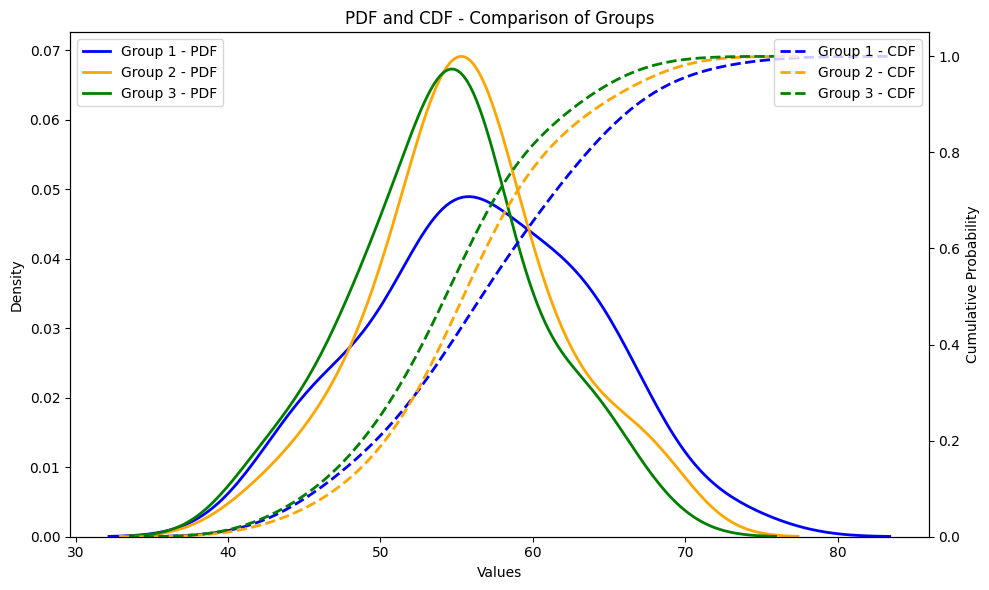

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Plotting PDF and CDF together using dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDFs on primary y-axis (left)
sns.kdeplot(G1, label='Group 1 - PDF', color='blue', linestyle='-', linewidth=2, ax=ax1)
sns.kdeplot(G2, label='Group 2 - PDF', color='orange', linestyle='-', linewidth=2, ax=ax1)
sns.kdeplot(G3, label='Group 3 - PDF', color='green', linestyle='-', linewidth=2, ax=ax1)

ax1.set_xlabel('Values')
ax1.set_ylabel('Density')

# Create a secondary y-axis for CDFs (right)
ax2 = ax1.twinx()

# Plot CDFs on secondary y-axis (right)
sns.kdeplot(G1, cumulative=True, label='Group 1 - CDF', color='blue', linestyle='--', linewidth=2, ax=ax2)
sns.kdeplot(G2, cumulative=True, label='Group 2 - CDF', color='orange', linestyle='--', linewidth=2, ax=ax2)
sns.kdeplot(G3, cumulative=True, label='Group 3 - CDF', color='green', linestyle='--', linewidth=2, ax=ax2)

ax2.set_ylabel('Cumulative Probability')

# Title and legend
ax1.set_title('PDF and CDF - Comparison of Groups')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Plot Name   : Q-Q Plot

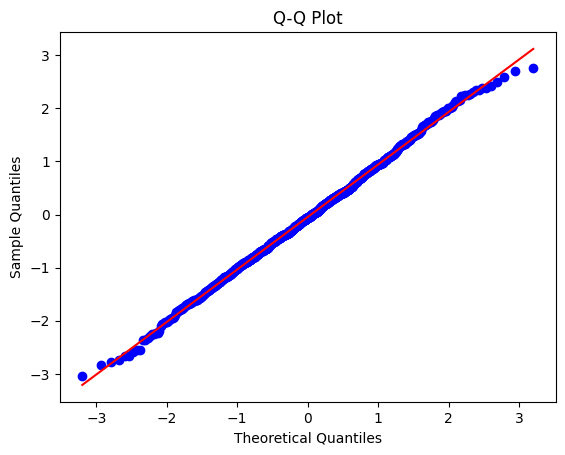

In [30]:
"""
----------------------------------------------------------------------------------------------------------------
Plot Name   : Q-Q Plot
Use Case    : Assess if a sample follows a specified theoretical distribution (e.g., normal distribution).
Assumption  : Data should be from populations that are normally distributed for a Q-Q plot against normal distribution.
Advantage   : Provides a visual assessment of the fit of the data to the specified distribution.
Limitations : Subjective interpretation of fit; should be supplemented with statistical tests.

H0 : Data follows the specified theoretical distribution (e.g., normal distribution)
Ha : Data does not follow the specified theoretical distribution

----------------------------------------------------------------------------------------------------------------
"""
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Generate example data (replace with your actual dataset)
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)  # Example: normally distributed data

# Create Q-Q plot against normal distribution
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()
